# Introduction

Analyzing the effects of various features on 2015 Kings County housing prices using Linear Regression Modeling.
Specifically looking at effects on Price Per Square Foot (PSF).
PSF is another measure of value in addition to just overall price.

# Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#Importing model function from class
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [3]:
# Data Import
df = pd.read_csv('data/kc_house_data.csv')

# Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Visualizations

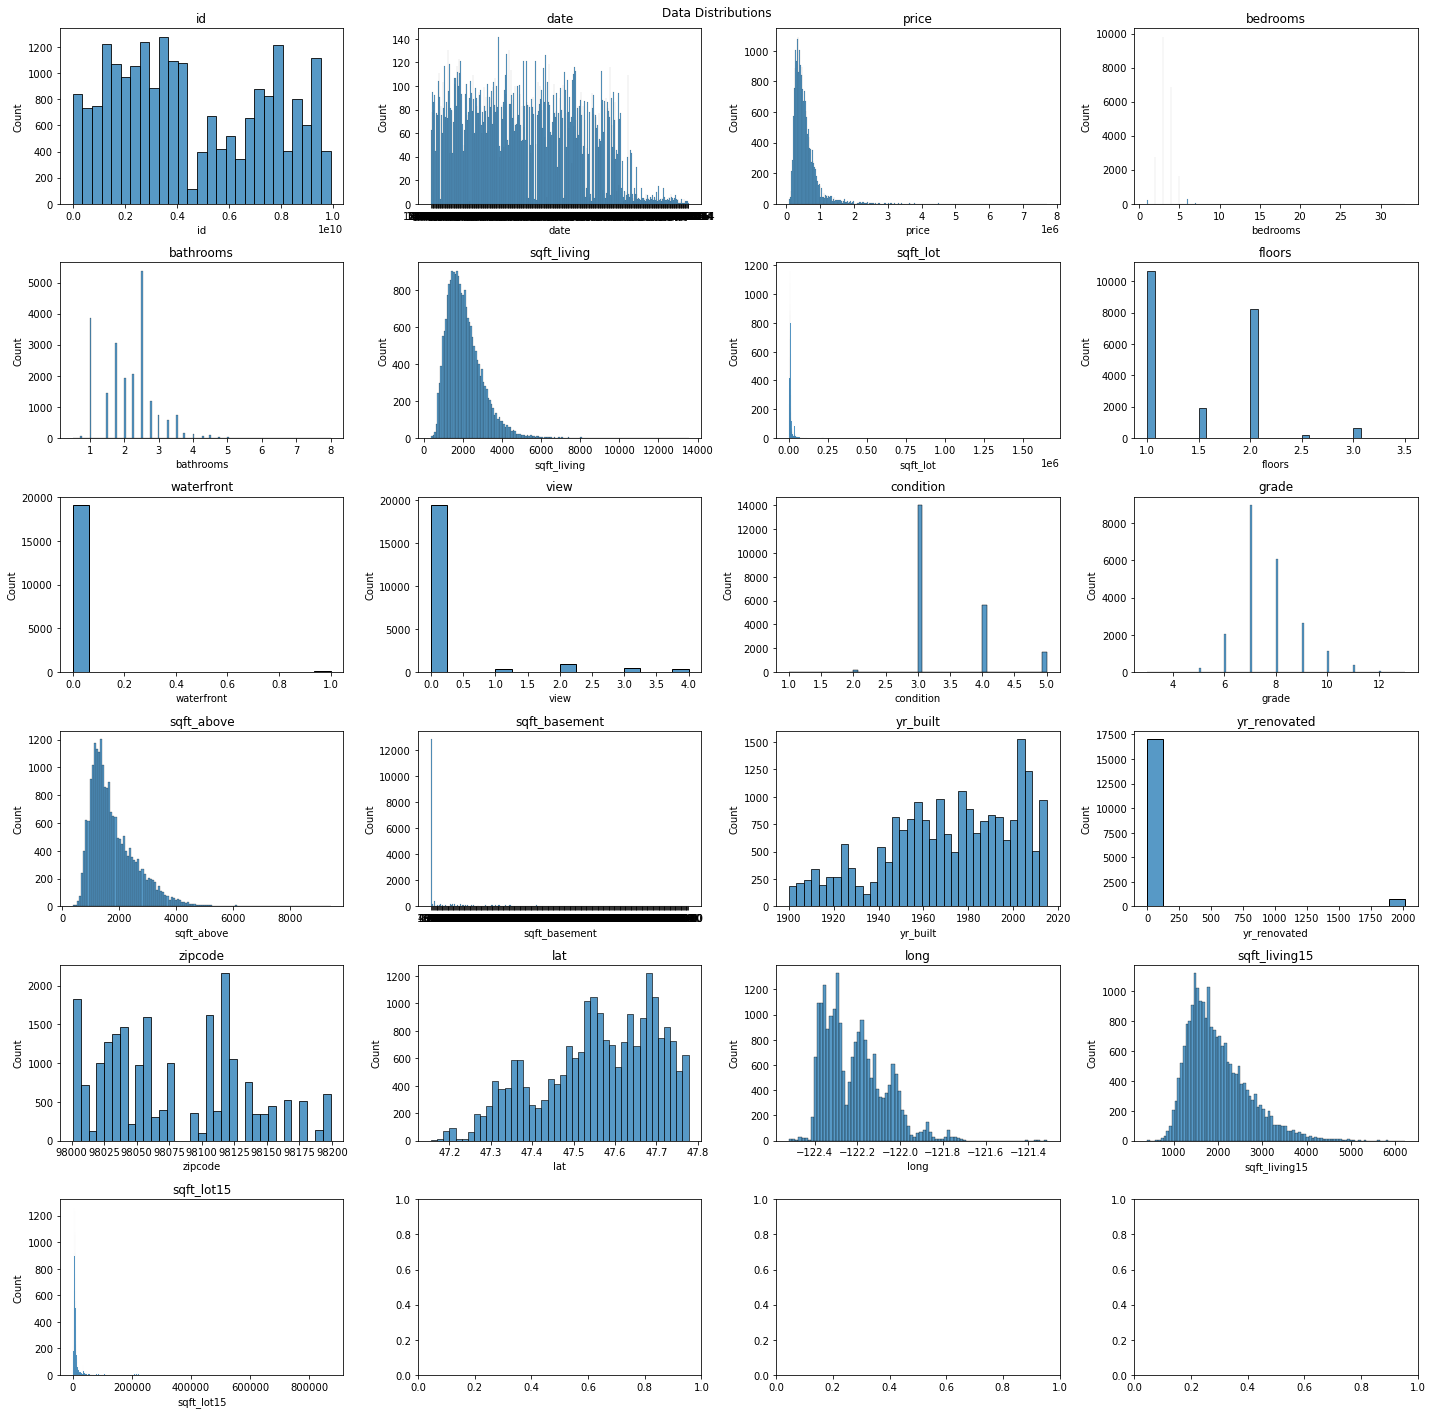

In [8]:
# Looking at the distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=6)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

## Findings

* Many of the distributions are skewed to the right with strong outliers
* Other features do not make sense to analyze numerically such as: id, date, zipcodes
* A few others need additional exploration such as: basement sqft, year renovated that also have large 0 value counts

In [9]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

#columns to be dropped
dropped_columns = ['id','date','view','sqft_living15','sqft_lot15','zipcode', 'lat','long']

# Data Cleaning

## Dropping Unwanted Columns

In [10]:
cleaned_df = df.drop(dropped_columns,axis=1)

In [11]:
cleaned_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

## Filling NA values with 0

In [12]:
for col in cleaned_df.columns:
    print(col,": ",cleaned_df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842


In [13]:
cleaned_df = cleaned_df.fillna(0)

In [14]:
for col in cleaned_df.columns:
    print(col,": ",cleaned_df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0


## Converting Basement SqFt to Float

In [15]:
cleaned_df = cleaned_df.replace(to_replace='?',value=0)

In [16]:
cleaned_df['sqft_basement'] = cleaned_df.sqft_basement.astype(float)

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.1 MB


# Generating and Modifying Features

In [18]:
mod_df = cleaned_df

## Price Per Square Foot (PSF) Using Sqft_Above

In [19]:
mod_df['psf'] = mod_df['price'] / mod_df['sqft_above']

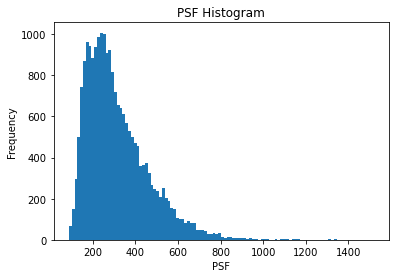

In [20]:
plt.hist(mod_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency');

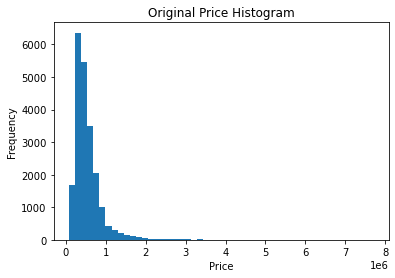

In [21]:
plt.hist(mod_df['price'], bins=50);
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency');

* PSF appears more normally distributed than original price, 
  but distribution remains skewed towards higher PSF

## Living to Lot Sqft Ratio

In [22]:
mod_df['livtolot'] = mod_df['sqft_living']/mod_df['sqft_lot']

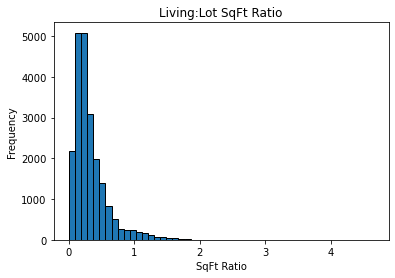

In [23]:
plt.hist(mod_df['livtolot'], bins=50, ec = 'black');
plt.title('Living:Lot SqFt Ratio')
plt.xlabel('SqFt Ratio')
plt.ylabel('Frequency');

## Categorical Changes

### Basement Sqft to Categorical (Yes or No)

In [24]:
mod_df['has_basement'] = mod_df['sqft_basement'] > 0
mod_df['has_basement'] = mod_df['has_basement'].astype(int)

In [25]:
mod_df['has_basement'].value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

### Basement Sqft to Categorical (Yes or No)

### Renovation Year to Categorical (Recent Reno or None)

In [26]:
# Using 27 years as a cutoff between recent renovations
mod_df['rec_reno'] = (mod_df['yr_renovated'] > 1988).astype(int)

In [27]:
mod_df['rec_reno'].value_counts()

0    21055
1      542
Name: rec_reno, dtype: int64

# Modified Features Exploration

## Dropping Unused Columns

In [28]:
processed = mod_df

In [29]:
processed.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'psf', 'livtolot', 'has_basement',
       'rec_reno'],
      dtype='object')

In [30]:
modded_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated']

In [31]:
processed = processed.drop(modded_cols, axis =1)

In [32]:
processed.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno'],
      dtype='object')

## Linearity Checks

In [33]:
len(processed.columns)

11

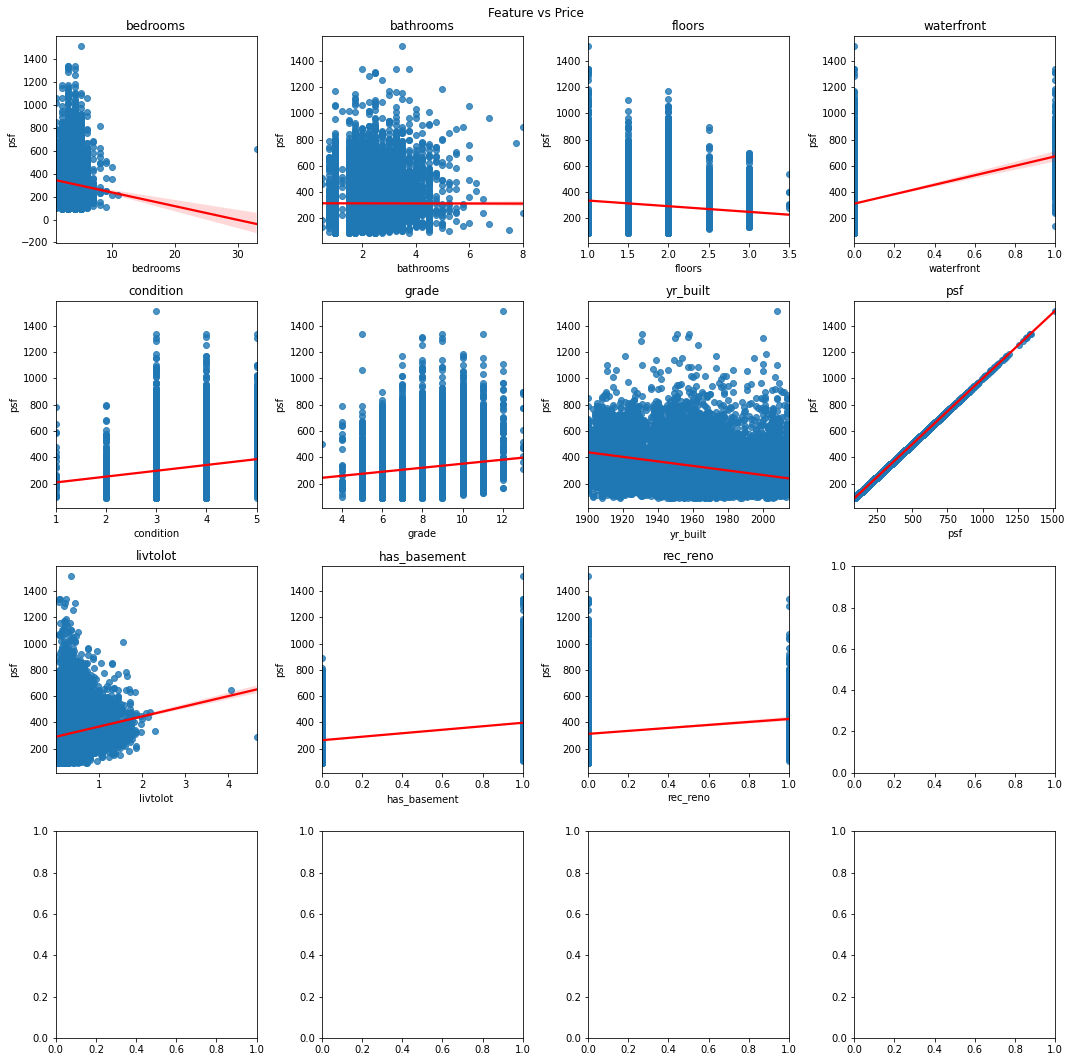

In [34]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(processed.columns)):
    col = processed.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    sns.regplot(x=col, y='psf', data=processed, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

#### Removing Erroneous Looking Bedroom Value

In [35]:
processed = processed.drop(processed.loc[processed.bedrooms > 30].index)

#### Removing Large Liv to Lot Values

In [36]:
processed = processed.drop(processed.loc[processed.livtolot > 4].index)

## Second Linearity Checks

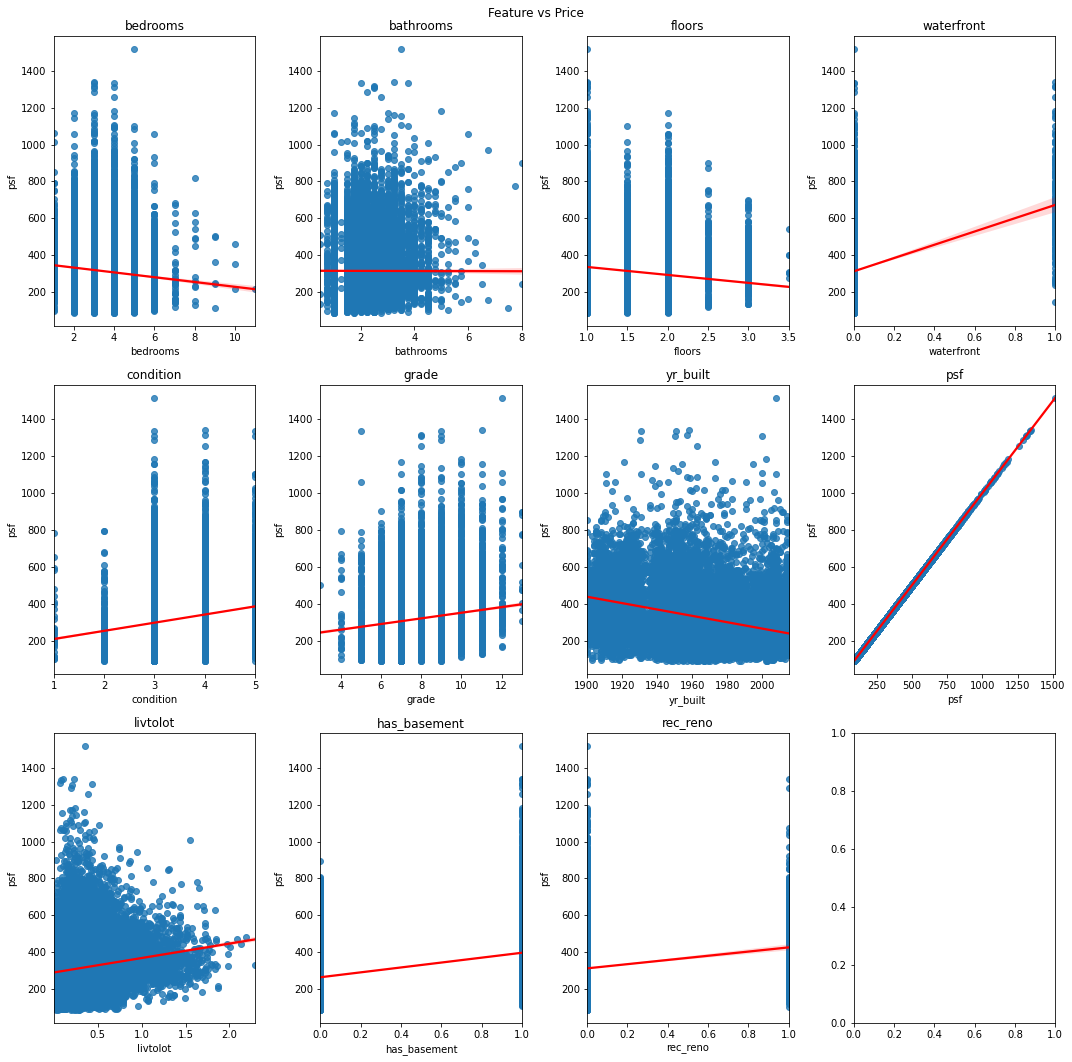

In [37]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(processed.columns)):
    col = processed.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='psf', data=processed, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

### Findings

* Many of the features do not appear strongly lineary related to PSF
* Considering transformations to improve R Squared after initial analysis

## MultiCollinearity

In [38]:
processed.corr()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
bedrooms,1.000000,0.527960,0.183948,-0.002058,0.023418,0.366487,0.160948,-0.079863,0.028521,0.160524,0.031583
bathrooms,0.527960,1.000000,0.502606,0.063629,-0.126446,0.665893,0.507177,-0.001636,0.290111,0.159860,0.068414
floors,0.183948,0.502606,1.000000,0.020808,-0.263984,0.458587,0.489176,-0.157900,0.560918,-0.252647,0.007530
waterfront,-0.002058,0.063629,0.020808,1.000000,0.016655,0.082842,-0.024499,0.200305,-0.030009,0.039230,0.048175
condition,0.023418,-0.126446,-0.263984,0.016655,1.000000,-0.146818,-0.361657,0.195487,-0.157287,0.130444,-0.072412
grade,0.366487,0.665893,0.458587,0.082842,-0.146818,1.000000,0.447779,0.121800,0.192043,0.050561,0.037720
yr_built,0.160948,0.507177,0.489176,-0.024499,-0.361657,0.447779,1.000000,-0.344073,0.283016,-0.164159,-0.155568
psf,-0.079863,-0.001636,-0.157900,0.200305,0.195487,0.121800,-0.344073,1.000000,0.141329,0.438232,0.120538
livtolot,0.028521,0.290111,0.560918,-0.030009,-0.157287,0.192043,0.283016,0.141329,1.000000,0.153518,0.013344
has_basement,0.160524,0.159860,-0.252647,0.039230,0.130444,0.050561,-0.164159,0.438232,0.153518,1.000000,0.049459


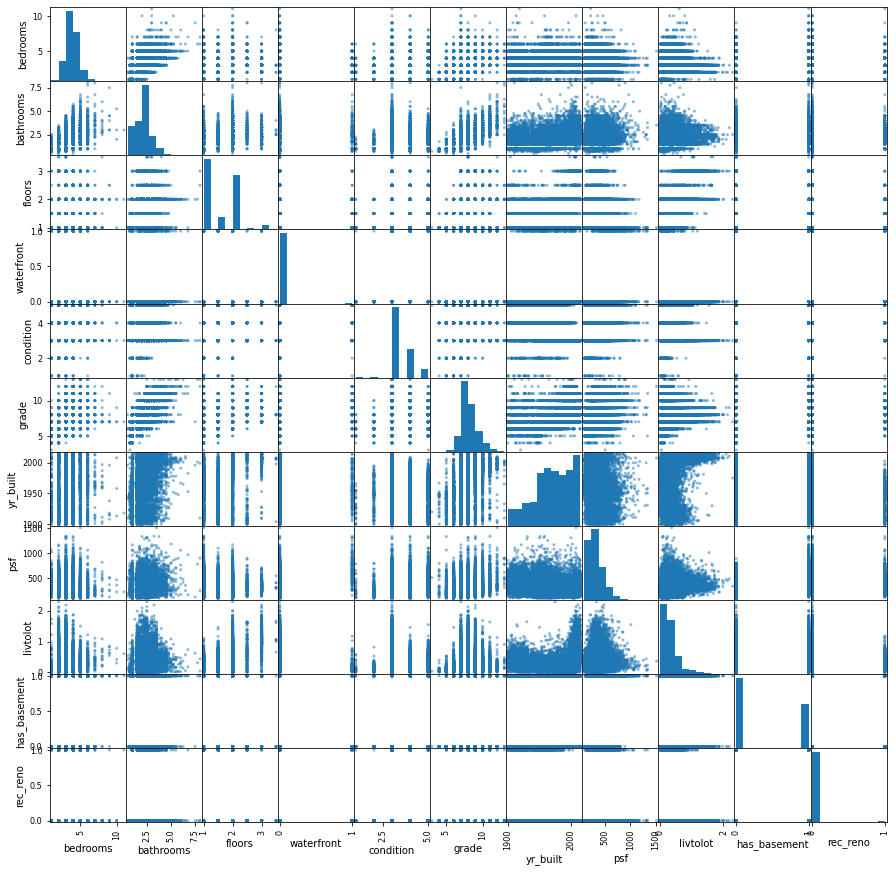

In [39]:
pd.plotting.scatter_matrix(processed, figsize = [15,15]);

### Findings

* There aren't any strong multicollinear features present
* Need to keep an eye on the relationship between bathrooms, floors, grade, and year built

# Initial Regression Modeling

In [40]:
processed.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno'],
      dtype='object')

In [86]:
x = processed[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y = processed[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## Model Summary

In [42]:
initial_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.42772036388532453
Test R2:  0.43189166713740834
Train RMSE:  111.67225822193916
Test RMSE:  110.55298979524385


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     1290.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:24:56   Log-Likelihood:            -1.0597e+05
No. Observations:               17275   AIC:                         2.120e+05
Df Residuals:                   17264   BIC:                         2.121e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3855.5731     77.602     49.684      0.000    3703.466    4007.681
bedrooms       -29.9593      1.139    -26.308      0.000     -32.191     -27.727
bathrooms        0.4344      1.873      0.232      0.817      -3.236       4.105
floors         -41.6140      2.541    -16.380      0.000     -46.594     -36.634
waterfront     273.2573     10.420     26.224      0.000     252.833     293.681
condition       16.0454      1.437     11.169      0.000      13.229      18.861
grade           45.6525      1.010     45.219      0.000      43.674      47.631
yr_built        -1.9601      0.039    -49.631      0.000      -2.037      -1.883
livtolot       135.6868      4.276     31.730      0.000     127.305     144.069
has_basement    88.1669      2.145     41.102      0.000      83.962      92.371
rec_reno        37.5517      5.578      6.732      0.000      26.618      48.485
==============================================================================
Omnibus:                     3925.818   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14705.241
Skew:                           1.102   Prob(JB):                         0.00
Kurtosis:                       6.946   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dropping High P Values

In [43]:
x_bath = x.drop('bathrooms', axis = 1)

### Model Summary Update

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_bath,y,test_size=0.2)
initial_model2 = model(x_train,x_test,y_train,y_test);

Train R2:  0.4281619558156421
Test R2:  0.430098969763941
Train RMSE:  112.27575469643449
Test RMSE:  108.08471376360355


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1436.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:24:56   Log-Likelihood:            -1.0607e+05
No. Observations:               17275   AIC:                         2.122e+05
Df Residuals:                   17265   BIC:                         2.122e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3964.2713     73.196     54.159      0.000    3820.799    4107.744
bedrooms       -29.4485      1.047    -28.138      0.000     -31.500     -27.397
floors         -37.3423      2.492    -14.984      0.000     -42.227     -32.457
waterfront     276.1048     10.473     26.363      0.000     255.576     296.633
condition       16.1955      1.438     11.264      0.000      13.377      19.014
grade           46.7125      0.928     50.324      0.000      44.893      48.532
yr_built        -2.0224      0.038    -53.721      0.000      -2.096      -1.949
livtolot       130.8095      4.368     29.947      0.000     122.248     139.371
has_basement    89.2260      2.088     42.736      0.000      85.134      93.318
rec_reno        25.3282      5.594      4.528      0.000      14.364      36.292
==============================================================================
Omnibus:                     3909.498   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14368.980
Skew:                           1.103   Prob(JB):                         0.00
Kurtosis:                       6.885   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions Check

### Normalization

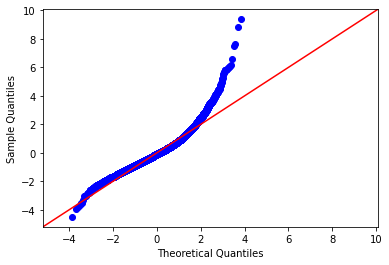

In [45]:
initial_residuals = initial_model2.resid
fig = sm.graphics.qqplot(initial_residuals,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

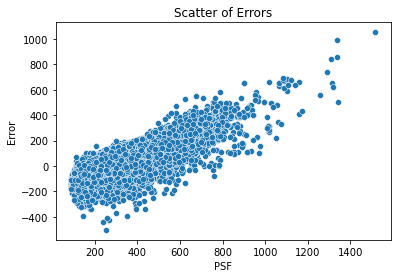

In [46]:
sns.scatterplot(y_train,initial_residuals)
plt.title('Scatter of Errors')
plt.xlabel('PSF')
plt.ylabel('Error');

## Findings

* Benchmark R-Squared is .433
* RMSE difference between Train and Test is low at ~4 PSF 
* Distribution of Residuals are skewed to the right
* Fails homoscedasticity check, higher PSF are underpredicted

# Iteration 2: Log Transforms

## Log Transformation

In [47]:
log_df = processed.drop('bathrooms',axis=1)

In [48]:
log_cont = ['bedrooms','floors','condition','grade','yr_built','psf','livtolot']

In [49]:
for cat in log_cont:
    log_df[cat] = np.log(log_df[cat])

In [50]:
log_df.head()

,bedrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
0,1.098612,0.000000,0.0,1.098612,1.945910,7.578145,5.236712,-1.566141,0,0
1,1.098612,0.693147,0.0,1.098612,1.945910,7.576097,5.513131,-1.035992,1,1
2,0.693147,0.000000,0.0,1.098612,1.791759,7.566828,5.454322,-2.563950,0,0
3,1.386294,0.000000,0.0,1.609438,1.945910,7.583248,6.354784,-0.936493,1,0
4,1.098612,0.000000,0.0,1.098612,2.079442,7.594381,5.715617,-1.570598,0,0


## Model Summary

In [51]:
x_log = log_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = log_df[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.41158552837081896
Test R2:  0.4339483765969848
Train RMSE:  0.33841914807262213
Test RMSE:  0.33783860454872183


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     1342.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:24:57   Log-Likelihood:                -5795.2
No. Observations:               17275   AIC:                         1.161e+04
Df Residuals:                   17265   BIC:                         1.169e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       83.8925      1.675     50.078      0.000      80.609      87.176
bedrooms        -0.3890      0.010    -38.566      0.000      -0.409      -0.369
floors          -0.0948      0.010     -9.230      0.000      -0.115      -0.075
waterfront       0.5012      0.033     15.330      0.000       0.437       0.565
condition        0.1601      0.015     10.400      0.000       0.130       0.190
grade            1.0815      0.022     48.605      0.000       1.038       1.125
yr_built       -10.5668      0.222    -47.582      0.000     -11.002     -10.132
livtolot         0.0692      0.003     20.090      0.000       0.062       0.076
has_basement     0.3221      0.006     53.161      0.000       0.310       0.334
rec_reno         0.0692      0.017      4.017      0.000       0.035       0.103
==============================================================================
Omnibus:                       40.186   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.711
Skew:                          -0.030   Prob(JB):                     1.60e-11
Kurtosis:                       3.256   Cond. No.                     5.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary Update - Only Log Transform Features

In [52]:
x_log = log_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = processed[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.4138595235209266
Test R2:  0.4353565739281078
Train RMSE:  113.02165728090593
Test RMSE:  110.18427370697043


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     1354.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:24:57   Log-Likelihood:            -1.0618e+05
No. Observations:               17275   AIC:                         2.124e+05
Df Residuals:                   17265   BIC:                         2.125e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.698e+04    554.190     48.683      0.000    2.59e+04    2.81e+04
bedrooms      -117.4460      3.370    -34.851      0.000    -124.051    -110.840
floors         -33.1003      3.420     -9.677      0.000     -39.805     -26.396
waterfront     283.9462     10.861     26.143      0.000     262.657     305.236
condition       58.8650      5.140     11.452      0.000      48.790      68.940
grade          351.5595      7.451     47.185      0.000     336.955     366.164
yr_built     -3598.8106     73.473    -48.981      0.000   -3742.825   -3454.796
livtolot        25.9732      1.159     22.410      0.000      23.702      28.245
has_basement    98.6926      2.015     48.981      0.000      94.743     102.642
rec_reno        35.0298      5.726      6.117      0.000      23.805      46.254
==============================================================================
Omnibus:                     3807.157   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13808.229
Skew:                           1.078   Prob(JB):                         0.00
Kurtosis:                       6.812   Cond. No.                     5.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary Update - Only Log Transform PSF

In [53]:
x_log = processed[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = log_df[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.43316580127456283
Test R2:  0.4106787128811208
Train RMSE:  0.33433804090295244
Test RMSE:  0.33547246531379926


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:24:57   Log-Likelihood:                -5585.6
No. Observations:               17275   AIC:                         1.119e+04
Df Residuals:                   17265   BIC:                         1.127e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.2867      0.216     75.276      0.000      15.863      16.711
bedrooms        -0.1004      0.003    -32.132      0.000      -0.106      -0.094
floors          -0.1152      0.007    -15.545      0.000      -0.130      -0.101
waterfront       0.5201      0.031     16.582      0.000       0.459       0.582
condition        0.0487      0.004     11.370      0.000       0.040       0.057
grade            0.1407      0.003     51.100      0.000       0.135       0.146
yr_built        -0.0059      0.000    -52.906      0.000      -0.006      -0.006
livtolot         0.3969      0.013     30.931      0.000       0.372       0.422
has_basement     0.2885      0.006     46.585      0.000       0.276       0.301
rec_reno         0.0795      0.017      4.751      0.000       0.047       0.112
==============================================================================
Omnibus:                       30.979   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.071
Skew:                          -0.029   Prob(JB):                     8.92e-09
Kurtosis:                       3.220   Cond. No.                     1.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Log transforming PSF yielded best results along with no high p values

## Assumptions Check

### Normalization

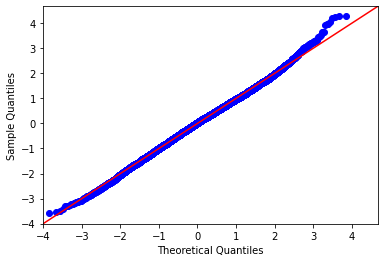

In [55]:
log_residuals = log_model.resid
fig = sm.graphics.qqplot(log_residuals,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

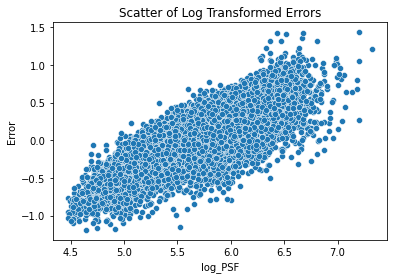

In [56]:
sns.scatterplot(y_train,log_residuals)
plt.title('Scatter of Log Transformed Errors')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R Squared is worse at .426 after log transforming just PSF
* Difference in RMSE is low at .001 log(PSF), equates to ~ 1 PSF
* Distribution of residuals is close to normal
* Still fails homoscedasticity.  However, appears more randomly distributed

# Iteration 3: Adding Back ZipCodes

* Considered adding back some location features to see the effects on the model

## Re-updating DataFrame and Cleaning

In [57]:
dropped_columns2 = ['id','date','view','sqft_living15','sqft_lot15','bathrooms', 'lat','long']

In [58]:
df_zip = df.drop(dropped_columns2,axis=1)

In [59]:
df_zip.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [60]:
# Handling NA Values
df_zip = df_zip.fillna(0)
df_zip = df_zip.replace(to_replace='?',value=0)

# Feature Generation and Modifications
df_zip['sqft_basement'] = df_zip.sqft_basement.astype(float)
df_zip['psf'] = df_zip['price'] / df_zip['sqft_above']
df_zip['livtolot'] = df_zip['sqft_living']/df_zip['sqft_lot']
df_zip['has_basement'] = df_zip['sqft_basement'] > 0
df_zip['has_basement'] = df_zip['has_basement'].astype(int)
df_zip['rec_reno'] = (df_zip['yr_renovated'] > 1988).astype(int)

modded_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated']
df_zip = df_zip.drop(modded_cols, axis =1)

# Removing Extreme Values
df_zip = df_zip.drop(df_zip.loc[df_zip.bedrooms > 30].index)
df_zip = df_zip.drop(df_zip.loc[df_zip.livtolot > 4].index)

In [61]:
df_zip.head()

,bedrooms,floors,waterfront,condition,grade,yr_built,zipcode,psf,livtolot,has_basement,rec_reno
0,3,1.0,0.0,3,7,1955,98178,188.050847,0.208850,0,0
1,3,2.0,0.0,3,7,1951,98125,247.926267,0.354874,1,1
2,2,1.0,0.0,3,6,1933,98028,233.766234,0.077000,0,0
3,4,1.0,0.0,5,7,1965,98136,575.238095,0.392000,1,0
4,3,1.0,0.0,3,8,1987,98074,303.571429,0.207921,0,0


## Creating Dummy Variables for Zipcodes

In [62]:
dummy_zips = pd.get_dummies(df_zip['zipcode'], prefix='zip', drop_first=True)
df_zip = pd.concat([df_zip, dummy_zips], axis=1)

In [63]:
df_zip = df_zip.drop('zipcode', axis=1)

## Model Summary

In [64]:
x_zip = df_zip.drop('psf',axis=1)
y_zip = df_zip[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_zip,y_zip,test_size=0.2)
zip_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.7179469899920938
Test R2:  0.7107005972255148
Train RMSE:  78.06700927257458
Test RMSE:  80.2206942383003


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     561.2
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:24:58   Log-Likelihood:                -99789.
No. Observations:               17275   AIC:                         1.997e+05
Df Residuals:                   17196   BIC:                         2.003e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      153.3598     68.243      2.247      0.025      19.596     287.124
bedrooms       -20.3096      0.747    -27.200      0.000     -21.773     -18.846
floors         -44.5350      1.776    -25.082      0.000     -48.015     -41.055
waterfront     330.6545      7.378     44.819      0.000     316.194     345.115
condition       18.5967      1.034     17.984      0.000      16.570      20.624
grade           13.4364      0.729     18.442      0.000      12.008      14.864
yr_built        -0.0107      0.035     -0.306      0.760      -0.079       0.058
livtolot       -32.0133      3.687     -8.683      0.000     -39.240     -24.786
has_basement    73.4166      1.486     49.398      0.000      70.503      76.330
rec_reno        42.7595      3.961     10.796      0.000      34.996      50.523
zip_98002       -5.3407      7.771     -0.687      0.492     -20.572       9.891
zip_98003       -6.0970      7.113     -0.857      0.391     -20.038       7.844
zip_98004      369.2065      6.869     53.746      0.000     355.742     382.671
zip_98005      184.0266      8.186     22.480      0.000     167.981     200.072
zip_98006      177.3652      6.194     28.636      0.000     165.225     189.506
zip_98007      159.0352      8.828     18.016      0.000     141.732     176.338
zip_98008      164.8108      7.008     23.517      0.000     151.074     178.547
zip_98010       56.1320     10.026      5.599      0.000      36.481      75.783
zip_98011       91.6570      7.817     11.725      0.000      76.335     106.979
zip_98014       70.2953      9.267      7.585      0.000      52.131      88.460
zip_98019       66.0029      7.923      8.331      0.000      50.474      81.532
zip_98022        8.6605      7.259      1.193      0.233      -5.568      22.889
zip_98023      -17.1583      6.101     -2.812      0.005     -29.117      -5.200
zip_98024       84.6337     11.213      7.548      0.000      62.655     106.612
zip_98027      115.8434      6.347     18.251      0.000     103.402     128.285
zip_98028       88.1117      6.963     12.655      0.000      74.464     101.759
zip_98029      144.7793      6.773     21.377      0.000     131.504     158.054
zip_98030        6.2376      7.104      0.878      0.380      -7.688      20.163
zip_98031        8.5153      7.078      1.203      0.229      -5.359      22.389
zip_98032      -14.5376      9.225     -1.576      0.115     -32.620       3.545
zip_98033      220.6430      6.307     34.985      0.000     208.281     233.005
zip_98034      126.7007      5.980     21.188      0.000     114.980     138.422
zip_98038       38.0349      5.936      6.407      0.000      26.400      49.670
zip_98039      479.2679     13.941     34.379      0.000     451.943     506.593
zip_98040      271.4886      7.110     38.186      0.000     257.553     285.424
zip_9

### Dropping High P

In [65]:
(zip_model.pvalues > .05).sort_values()

Intercept    False
zip_98109    False
zip_98108    False
zip_98107    False
zip_98106    False
             ...  
zip_98042     True
zip_98198     True
zip_98188     True
zip_98030     True
zip_98032     True
Length: 79, dtype: bool

In [66]:
high_p = zip_model.pvalues.loc[zip_model.pvalues > .05].index
high_p

Index(['yr_built', 'zip_98002', 'zip_98003', 'zip_98022', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98042', 'zip_98092', 'zip_98188',
       'zip_98198'],
      dtype='object')

In [67]:
#Intercept excluded for dropping columns
high_p_indexes = ['yr_built', 'zip_98002', 'zip_98003', 'zip_98022',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98042', 'zip_98092',
       'zip_98198']

In [68]:
zip_df_update = df_zip.drop(high_p_indexes,axis=1)

### Model Summary Update

In [69]:
x_zip2 = zip_df_update.drop('psf',axis=1)
y_zip2= zip_df_update[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_zip2,y_zip2,test_size=0.2)
zip_model2 = model(x_train,x_test,y_train,y_test);

Train R2:  0.710518424428937
Test R2:  0.7390383207437037
Train RMSE:  79.27639410720896
Test RMSE:  75.47955708953391


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     621.0
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:24:59   Log-Likelihood:            -1.0005e+05
No. Observations:               17275   AIC:                         2.002e+05
Df Residuals:                   17206   BIC:                         2.008e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      131.4906      6.281     20.936      0.000     119.180     143.801
bedrooms       -20.4730      0.758    -26.996      0.000     -21.960     -18.987
floors         -43.7436      1.766    -24.772      0.000     -47.205     -40.282
waterfront     330.1447      7.586     43.518      0.000     315.275     345.015
condition       19.7030      1.007     19.561      0.000      17.729      21.677
grade           13.6867      0.695     19.686      0.000      12.324      15.049
livtolot       -34.3149      3.412    -10.058      0.000     -41.002     -27.628
has_basement    73.6848      1.506     48.928      0.000      70.733      76.637
rec_reno        37.6262      3.894      9.662      0.000      29.993      45.259
zip_98004      368.2677      5.416     67.995      0.000     357.651     378.884
zip_98005      178.9303      7.188     24.892      0.000     164.841     193.020
zip_98006      172.2973      4.382     39.317      0.000     163.708     180.887
zip_98007      151.8189      7.453     20.369      0.000     137.210     166.428
zip_98008      161.2197      5.636     28.607      0.000     150.173     172.266
zip_98010       51.1656      8.784      5.825      0.000      33.949      68.382
zip_98011       85.4230      6.541     13.060      0.000      72.602      98.244
zip_98014       61.7913      8.142      7.589      0.000      45.832      77.750
zip_98019       62.9869      6.573      9.583      0.000      50.104      75.870
zip_98023      -20.7472      4.288     -4.838      0.000     -29.152     -12.342
zip_98024       88.1045     10.320      8.537      0.000      67.876     108.333
zip_98027      110.9767      4.754     23.344      0.000     101.658     120.295
zip_98028       83.8880      5.507     15.232      0.000      73.093      94.683
zip_98029      138.2993      5.296     26.113      0.000     127.918     148.680
zip_98033      207.6717      4.675     44.423      0.000     198.508     216.835
zip_98034      120.0076      4.212     28.492      0.000     111.752     128.263
zip_98038       36.3794      4.038      9.009      0.000      28.464      44.294
zip_98039      460.6854     12.300     37.453      0.000     436.576     484.795
zip_98040      270.1629      5.552     48.663      0.000     259.281     281.045
zip_98045       60.9423      6.243      9.761      0.000      48.704      73.180
zip_98052      144.0990      4.066     35.437      0.000     136.129     152.070
zip_98053      112.5488      4.751     23.689      0.000     103.236     121.861
zip_98055       27.1962      5.621      4.839      0.000      16.179      38.213
zip_98056       63.8244      4.744     13.454      0.000      54.526      73.123
zip_98058       21.7701      4.422      4.924      0.000      13.103      30.437
zip_98059       60.6132      4.425     13.698      0.000      51.940      69.287
zip_9

## Assumptions Check

### Normalization

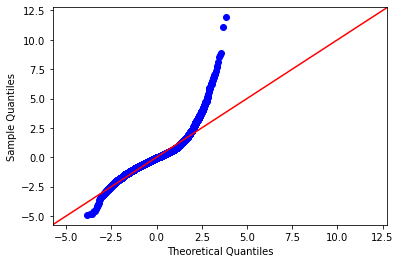

In [70]:
zip_residuals = zip_model2.resid
fig = sm.graphics.qqplot(zip_residuals,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

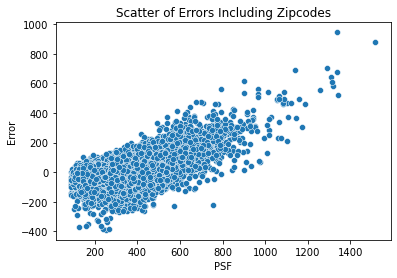

In [71]:
sns.scatterplot(y_train,zip_residuals)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('PSF')
plt.ylabel('Error');

## Log Transforming PSF for Zip Codes

In [72]:
zip_df_update2 = zip_df_update

In [73]:
zip_df_update2['psf'] = np.log(zip_df_update['psf'])

In [112]:
x_zip3 = zip_df_update2.drop('psf',axis=1)
y_zip3= zip_df_update2['psf']#.to_numpy().flatten()
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_zip3,y_zip3,test_size=0.2)
zip_model3 = model(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.7636772780116611
Test R2:  0.7638314769191112
Train RMSE:  0.21426812306092197
Test RMSE:  0.2190842699605597


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     817.7
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:53:52   Log-Likelihood:                 2100.4
No. Observations:               17275   AIC:                            -4063.
Df Residuals:                   17206   BIC:                            -3528.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0398      0.017    296.141      0.000       5.006       5.073
bedrooms        -0.0680      0.002    -32.824      0.000      -0.072      -0.064
floors          -0.1269      0.005    -26.411      0.000      -0.136      -0.117
waterfront       0.6692      0.020     32.682      0.000       0.629       0.709
condition        0.0572      0.003     20.971      0.000       0.052       0.062
grade            0.0397      0.002     21.055      0.000       0.036       0.043
livtolot        -0.1073      0.009    -11.555      0.000      -0.125      -0.089
has_basement     0.2353      0.004     57.685      0.000       0.227       0.243
rec_reno         0.0910      0.011      8.506      0.000       0.070       0.112
zip_98004        1.0781      0.015     74.107      0.000       1.050       1.107
zip_98005        0.6929      0.019     35.556      0.000       0.655       0.731
zip_98006        0.6555      0.012     55.158      0.000       0.632       0.679
zip_98007        0.6239      0.021     30.098      0.000       0.583       0.665
zip_98008        0.6318      0.015     41.619      0.000       0.602       0.662
zip_98010        0.2282      0.025      9.218      0.000       0.180       0.277
zip_98011        0.3888      0.017     22.569      0.000       0.355       0.423
zip_98014        0.2860      0.021     13.596      0.000       0.245       0.327
zip_98019        0.2669      0.018     15.242      0.000       0.233       0.301
zip_98023       -0.0641      0.012     -5.437      0.000      -0.087      -0.041
zip_98024        0.4300      0.027     15.898      0.000       0.377       0.483
zip_98027        0.4835      0.013     37.462      0.000       0.458       0.509
zip_98028        0.3934      0.015     26.574      0.000       0.364       0.422
zip_98029        0.5921      0.014     41.297      0.000       0.564       0.620
zip_98033        0.7528      0.012     60.732      0.000       0.728       0.777
zip_98034        0.5179      0.011     46.293      0.000       0.496       0.540
zip_98038        0.1270      0.011     11.600      0.000       0.106       0.148
zip_98039        1.2255      0.034     35.553      0.000       1.158       1.293
zip_98040        0.8918      0.015     58.308      0.000       0.862       0.922
zip_98045        0.2879      0.017     16.730      0.000       0.254       0.322
zip_98052        0.5929      0.011     53.155      0.000       0.571       0.615
zip_98053        0.4940      0.013     38.435      0.000       0.469       0.519
zip_98055        0.1246      0.015      8.077      0.000       0.094       0.155
zip_98056        0.2881      0.013     22.669      0.000       0.263       0.313
zip_98058        0.1331      0.012     10.825      0.000       0.109       0.157
zip_98059        0.2785      0.012     23.190      0.000       0.255       0.302
zip_9

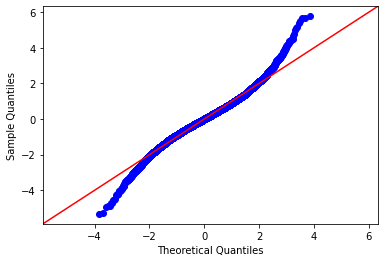

In [75]:
zip_residuals2 = zip_model3.resid
fig = sm.graphics.qqplot(zip_residuals2,dist=stats.norm,line='45',fit=True)

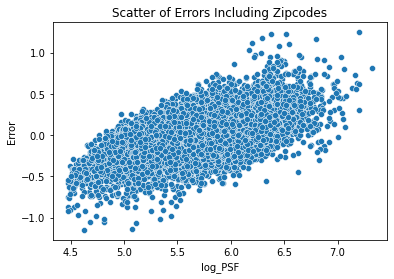

In [76]:
sns.scatterplot(y_train2,zip_residuals2)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R Squared improved greatly to .76 after adding back zipcodes and log transforming PSF
* Difference in RMSE remains at ~ 1 PSF (.001 log of PSF)
* Residual normality distribution improved, but skewed at the tails
* Homoscedasticity improved as well, but still does not appear random

# Iteration 4: Dropping Outliers

* Continuing to improve on the log transformed model with zipcodes

## Modifying Modeling for Outliers

In [77]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [78]:
def model_outlier(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

## Model Summary

In [94]:
x_zip4 = zip_df_update2.drop('psf',axis=1)
y_zip4= zip_df_update2['psf']
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_zip4,y_zip4,test_size=0.2)

In [95]:
zip_model4 = model_outlier(x_train4,x_test4,y_train4,y_test4);

Train R2:  0.7608271240567219
Test R2:  0.7681033172095121
Train RMSE:  0.21407048585568364
Test RMSE:  0.21474797712273735


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     803.5
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:39:43   Log-Likelihood:                 2112.6
No. Observations:               17244   AIC:                            -4087.
Df Residuals:                   17175   BIC:                            -3552.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0343      0.017    295.723      0.000       5.001       5.068
bedrooms        -0.0673      0.002    -32.737      0.000      -0.071      -0.063
floors          -0.1202      0.005    -25.148      0.000      -0.130      -0.111
waterfront       0.6496      0.022     29.953      0.000       0.607       0.692
condition        0.0579      0.003     21.330      0.000       0.053       0.063
grade            0.0387      0.002     20.367      0.000       0.035       0.042
livtolot        -0.1083      0.009    -11.731      0.000      -0.126      -0.090
has_basement     0.2397      0.004     58.765      0.000       0.232       0.248
rec_reno         0.1035      0.011      9.703      0.000       0.083       0.124
zip_98004        1.0657      0.015     72.672      0.000       1.037       1.094
zip_98005        0.6782      0.019     36.235      0.000       0.641       0.715
zip_98006        0.6564      0.012     54.620      0.000       0.633       0.680
zip_98007        0.6184      0.021     29.739      0.000       0.578       0.659
zip_98008        0.6321      0.015     41.872      0.000       0.603       0.662
zip_98010        0.1937      0.024      7.980      0.000       0.146       0.241
zip_98011        0.3957      0.018     22.470      0.000       0.361       0.430
zip_98014        0.2593      0.022     11.739      0.000       0.216       0.303
zip_98019        0.2635      0.018     14.710      0.000       0.228       0.299
zip_98023       -0.0606      0.012     -5.087      0.000      -0.084      -0.037
zip_98024        0.4232      0.028     15.310      0.000       0.369       0.477
zip_98027        0.4890      0.013     38.283      0.000       0.464       0.514
zip_98028        0.3761      0.015     25.528      0.000       0.347       0.405
zip_98029        0.5887      0.014     41.392      0.000       0.561       0.617
zip_98033        0.7419      0.013     57.973      0.000       0.717       0.767
zip_98034        0.5137      0.011     45.422      0.000       0.492       0.536
zip_98038        0.1213      0.011     10.998      0.000       0.100       0.143
zip_98039        1.2290      0.036     34.361      0.000       1.159       1.299
zip_98040        0.8719      0.015     56.485      0.000       0.842       0.902
zip_98045        0.2808      0.017     16.481      0.000       0.247       0.314
zip_98052        0.5962      0.011     53.850      0.000       0.575       0.618
zip_98053        0.4992      0.013     38.951      0.000       0.474       0.524
zip_98055        0.1163      0.015      7.598      0.000       0.086       0.146
zip_98056        0.2840      0.013     22.463      0.000       0.259       0.309
zip_98058        0.1237      0.012     10.273      0.000       0.100       0.147
zip_98059        0.2776      0.012     22.962      0.000       0.254       0.301
zip_9

## Assumptions Check

### Normalization

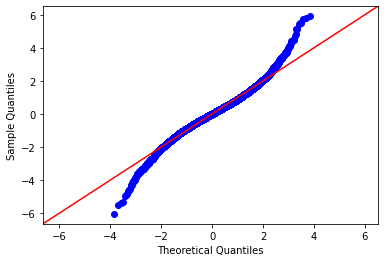

In [96]:
zip_residuals4 = zip_model4.resid
fig = sm.graphics.qqplot(zip_residuals4,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

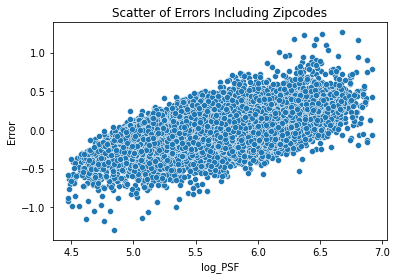

In [97]:
sns.scatterplot(y_train4,zip_residuals4)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* Model removing outliers did not improve overall

# Conclusion

## Model Summary of Log Transformed PSF including Zipcodes

In [98]:
x_zip3 = zip_df_update2.drop('psf',axis=1)
y_zip3= zip_df_update2[['psf']].to_numpy().flatten()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_zip3,y_zip3,test_size=0.2)
zip_model3 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.7646773088361098
Test R2:  0.7603232426575899
Train RMSE:  0.21511567244792726
Test RMSE:  0.21549402275532803


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     822.2
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:43:11   Log-Likelihood:                 2032.2
No. Observations:               17275   AIC:                            -3926.
Df Residuals:                   17206   BIC:                            -3391.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0303      0.017    294.473      0.000       4.997       5.064
bedrooms        -0.0681      0.002    -33.184      0.000      -0.072      -0.064
floors          -0.1268      0.005    -26.295      0.000      -0.136      -0.117
waterfront       0.6854      0.021     32.470      0.000       0.644       0.727
condition        0.0576      0.003     21.103      0.000       0.052       0.063
grade            0.0405      0.002     21.355      0.000       0.037       0.044
livtolot        -0.1073      0.009    -11.524      0.000      -0.126      -0.089
has_basement     0.2377      0.004     58.215      0.000       0.230       0.246
rec_reno         0.0994      0.011      9.220      0.000       0.078       0.120
zip_98004        1.0863      0.015     74.228      0.000       1.058       1.115
zip_98005        0.6794      0.020     34.453      0.000       0.641       0.718
zip_98006        0.6587      0.012     55.020      0.000       0.635       0.682
zip_98007        0.6326      0.020     30.898      0.000       0.592       0.673
zip_98008        0.6377      0.015     42.625      0.000       0.608       0.667
zip_98010        0.2030      0.024      8.517      0.000       0.156       0.250
zip_98011        0.3896      0.018     21.555      0.000       0.354       0.425
zip_98014        0.2984      0.023     12.710      0.000       0.252       0.344
zip_98019        0.2711      0.018     14.922      0.000       0.235       0.307
zip_98023       -0.0660      0.012     -5.669      0.000      -0.089      -0.043
zip_98024        0.4019      0.028     14.357      0.000       0.347       0.457
zip_98027        0.4931      0.013     38.785      0.000       0.468       0.518
zip_98028        0.3905      0.015     26.070      0.000       0.361       0.420
zip_98029        0.5940      0.015     40.817      0.000       0.565       0.623
zip_98033        0.7639      0.013     59.681      0.000       0.739       0.789
zip_98034        0.5198      0.011     45.817      0.000       0.498       0.542
zip_98038        0.1171      0.011     10.759      0.000       0.096       0.138
zip_98039        1.2575      0.036     35.019      0.000       1.187       1.328
zip_98040        0.8830      0.015     57.174      0.000       0.853       0.913
zip_98045        0.2857      0.016     17.340      0.000       0.253       0.318
zip_98052        0.5935      0.011     53.837      0.000       0.572       0.615
zip_98053        0.4927      0.013     37.946      0.000       0.467       0.518
zip_98055        0.1137      0.016      7.332      0.000       0.083       0.144
zip_98056        0.2919      0.013     22.686      0.000       0.267       0.317
zip_98058        0.1292      0.012     10.484      0.000       0.105       0.153
zip_98059        0.2823      0.012     23.485      0.000       0.259       0.306
zip_9

In [109]:
np.e**(zip_model3.params.sort_values(ascending=False))

Intercept    152.979108
zip_98039      3.516750
zip_98004      2.963349
zip_98119      2.908891
zip_98112      2.900496
                ...    
grade          1.041374
zip_98023      0.936177
bedrooms       0.934176
livtolot       0.898218
floors         0.880933
Length: 69, dtype: float64

# Appendix

## Other Explorations

### Regions using Latitude and Longitude

### Analysis via Regions using Zipcodes